# Introduciendo R en Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/home/cesar/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
import rpy2

In [3]:
import rpy2.robjects as ro
import rpy2.robjects.numpy2ri

In [4]:
rpy2.robjects.numpy2ri.activate()  ## asi pueden ambos objetos pueden vivir

In [5]:
codigo_r = """ 
saludar <- function(cadena){
return(paste("Hola",cadena))
}"""

In [6]:
ro.r(codigo_r)

R object with classes: ('function',) mapped to:

In [7]:
saludar_py = ro.globalenv["saludar"]

In [9]:
a =saludar_py("Antonio Banderas")
a[0]

'Hola Antonio Banderas'

In [10]:
type(a)

rpy2.robjects.vectors.StrVector

In [11]:
print(saludar_py.r_repr())

function (cadena) 
{
    return(paste("Hola", cadena))
}


In [14]:
var_from_python = ro.FloatVector(np.arange(1,5,0.1))

In [15]:
var_from_python

1.000000,1.100000,1.200000,...,4.700000,4.800000,4.900000


In [17]:
print(var_from_python.r_repr())

c(1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 
2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3, 3.1, 3.2, 3.3, 3.4, 3.5, 
3.6, 3.7, 3.8, 3.9, 4, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 
4.9)


In [18]:
print(var_from_python)

 [1] 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8
[20] 2.9 3.0 3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.0 4.1 4.2 4.3 4.4 4.5 4.6 4.7
[39] 4.8 4.9



In [19]:
ro.globalenv["var_to_r"]=var_from_python

In [20]:
ro.r("var_to_r")

1.000000,1.100000,1.200000,...,4.700000,4.800000,4.900000


In [21]:
ro.r("sum(var_to_r)")

118.000000


In [22]:
ro.r("sd(var_to_r)")

1.169045


In [23]:
np.sum(var_from_python)

118.00000000000007

In [26]:
np.std(var_from_python)

1.1543396380615207

In [27]:
ro.r("summary(var_to_r)")

1.000000,1.975000,2.950000,2.950000,3.925000,4.900000


In [28]:
ro.r("hist(var_to_r)")

breaks,[RTYPES.REALSXP]
counts,[RTYPES.INTSXP]
density,[RTYPES.REALSXP]
mids,[RTYPES.REALSXP]
xname,[RTYPES.STRSXP]
equidist,[RTYPES.LGLSXP]


## Trabajar de forma conjunta entre R y Python

In [29]:
from rpy2.robjects.packages import importr

In [47]:
ro.r("install.packages('extRemes')")# si os falla decidle 'n' al hacer la instalación

R[write to console]: Installing package into ‘/home/cesar/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘RcppArmadillo’, ‘Lmoments’


R[write to console]: probando la URL 'https://cloud.r-project.org/src/contrib/RcppArmadillo_0.9.860.2.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1637932 bytes (1,6 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =


<rpy2.rinterface_lib.sexp.NULLType object at 0x7f6df168a9b0> [RTYPES.NILSXP]

In [48]:
extremes = importr("extRemes") # library(extRemes)

PackageNotInstalledError: extRemes

In [49]:
fevd = extremes.fevd

NameError: name 'extremes' is not defined

## Funcion magica para R

In [37]:
%load_ext rpy2.ipython

In [38]:
help(rpy2.ipython.rmagic.RMagics.R)

Help on function R in module rpy2.ipython.rmagic:

R(self, line, cell=None, local_ns=None)
    ::
    
      %R [-i INPUT] [-o OUTPUT] [-n] [-w WIDTH] [-h HEIGHT] [-p POINTSIZE]
             [-b BG] [--noisolation] [-u {px,in,cm,mm}] [-r RES]
             [--type {cairo,cairo-png,Xlib,quartz}] [-c CONVERTER] [-d DISPLAY]
             [code [code ...]]
    
    Execute code in R, optionally returning results to the Python runtime.
    
    In line mode, this will evaluate an expression and convert the returned
    value to a Python object.  The return value is determined by rpy2's
    behaviour of returning the result of evaluating the final expression.
    
    Multiple R expressions can be executed by joining them with
    semicolons::
    
        In [9]: %R X=c(1,4,5,7); sd(X); mean(X)
        Out[9]: array([ 4.25])
    
    In cell mode, this will run a block of R code. The resulting value
    is printed if it would be printed when evaluating the same code
    within a standard R R

In [39]:
%R X=c(1,4,5,7); sd(X); mean(X)

array([4.25])

In [41]:
%%R
Y= c(2,4,3,9)
lm = lm(Y~X)
summary(lm)


Call:
lm(formula = Y ~ X)

Residuals:
    1     2     3     4 
 0,88 -0,24 -2,28  1,64 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   0,0800     2,3000   0,035    0,975
X             1,0400     0,4822   2,157    0,164

Residual standard error: 2,088 on 2 degrees of freedom
Multiple R-squared:  0,6993,	Adjusted R-squared:  0,549 
F-statistic: 4,651 on 1 and 2 DF,  p-value: 0,1638



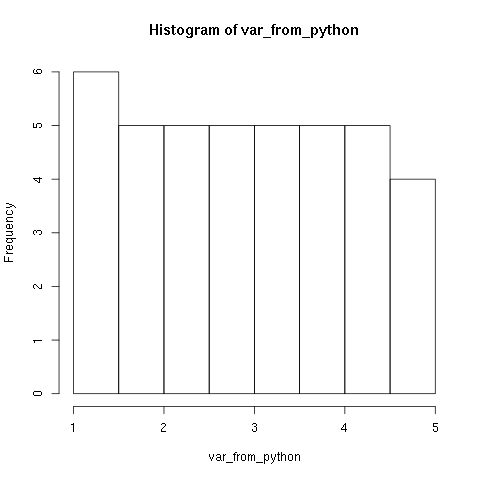

breaks,[RTYPES.REALSXP]
counts,[RTYPES.INTSXP]
density,[RTYPES.REALSXP]
mids,[RTYPES.REALSXP]
xname,[RTYPES.STRSXP]
equidist,[RTYPES.LGLSXP]


In [43]:
%R -i var_from_python hist(var_from_python)

## Un ejemplo complejo de R, Python y Rmagic

In [44]:
metodos =["MLE","GMLE"]
tipo = ["GEV","Gumbel"]

In [46]:
for t in tipo:
    for m in metodos:
        print("Tipo de Ajuste: ", t)
        print("Metodo del ajuste: ", m)
        result = fevd(max_ws.values,method = m, type =t)
        print(result.rx("result")[0])
        %R -i result plot.fevd(result)

Tipo de Ajuste:  GEV
Metodo del ajuste:  MLE


NameError: name 'fevd' is not defined